In [9]:
import numpy as np
import pandas as pd 

In [10]:
S = np.array(range(70))

In [11]:
S_total=1000
N=1000


In [12]:
V_n_i=np.zeros((N,71))
pol=np.zeros((N,71),dtype=object)


In [13]:
for i in S: 
    V_n_i[0][i] = 0
    pol[0][i] =1

In [14]:
beta=.9

In [15]:
R = [55,56,30,58,59,60,61,62,63,64]
p=[.05,.05,.1,.1,.2,.2,.1,.1,.05,.05]

In [ ]:
c1=2
c2=2
c3=2
c4=2
r1=4
r2=4
r3=4
r4=4
p2=.5
C=50

d1=50

for n in range(0,N):
    
    for i in S:
        #print(i)
        if n==0:
            V_n_i[n][i] = 0
        
        else:
            D1 = 20
            D2=15
            D3=10
            D4=15
            
            D=D1+D2+D3+D4
           
            
            a1_range = i
            high_value = 1000

# Create an array with high values as defaults
            f = np.full((100, 100, 100, 100), high_value)
            I1=i
            for a1 in range(0,I1+1):
                I2 = I1 -a1 + int(.8 *max(a1-D1,0))
                
                for a2 in range(0,I2+1):
                    I3 = I2 -a2 + int(.8 *max(a2-D2,0))
                    for a3 in range(0,I3+1): 
                        I4 = I3 -a3 + int(.8 *max(a3-D3,0))
                        for a4 in range(0,I4+1): 
                            I_f = I4 -a4 + int(.3 *max(a4-D4,0))
                    
                            E = abs((D1- max(D1-a1,0))/D1 - (D2- max(D2-a2,0))/D2 ) +abs((D3- max(D3-a3,0))/D3 - (D2- max(D2-a2,0))/D2 ) +abs((D4- max(D4-a4,0))/D4 - (D2- max(D2-a2,0))/D2 )+abs((D3- max(D3-a3,0))/D3 - (D4- max(D4-a4,0))/D4 )+abs((D1- max(D1-a1,0))/D1 - (D4- max(D4-a4,0))/D4 )+abs((D1- max(D1-a1,0))/D1 - (D3- max(D3-a3,0))/D3 )
                    
                            b=0
                            for k in range(0,10):
                                b=b+ p[k]* V_n_i[n-1][min(int(p2*I_f)+R[k],C)]
                            
                        
                            f[a1][a2][a3][a4] = c1*max(D1-a1,0) + c2 * max(D2-a2,0) - r1 *(D1- max(D1-a1,0)) - r2 *(D2- max(D2-a2,0)) + beta * b + d1*E
                    
            V_n_i[n][i] = np.min(f)
            min_index_flat = np.argmin(f)
            

            min_index= np.unravel_index(min_index_flat, f.shape)
            index_0, index_1, index_2, index_3 = min_index
            
            If_f = i - index_0 + int(.6* max(index_0-D1,0)) - index_1 + int(.6* max(index_1-D2,0))  -index_2+ int(.8 *max(index_2-D3,0)) -index_3 + int(.8 *max(index_3-D4,0))
                    
            
            pol[n][i]= (index_0,index_1,index_2,index_3,If_f)
    
    count =0
    for i in S: 
        
        
        if abs(V_n_i[n][i] - V_n_i[n-1][i]) <.1:
            count = count +1
    
    if count > S_total-1:
        
        break


In [ ]:
print(n) #number of iterations

In [88]:
pol[n][:-1]
dropped_tuple = pol[1][:-1]
dropped_tuple

array([(0, 0, 0, 0, 0), (0, 0, 0, 0, 1), (0, 0, 0, 0, 2), (1, 1, 0, 1, 0),
       (1, 1, 1, 1, 0), (2, 1, 1, 1, 0), (2, 2, 1, 1, 0), (2, 2, 1, 2, 0),
       (3, 2, 1, 2, 0), (3, 2, 1, 2, 1), (3, 3, 2, 2, 0), (4, 3, 2, 2, 0),
       (4, 3, 2, 3, 0), (4, 3, 2, 3, 1), (4, 3, 2, 3, 2), (5, 4, 2, 4, 0),
       (5, 4, 3, 4, 0), (6, 4, 3, 4, 0), (6, 5, 3, 4, 0), (6, 5, 3, 5, 0),
       (7, 5, 3, 5, 0), (7, 5, 3, 5, 1), (7, 6, 4, 5, 0), (8, 6, 4, 5, 0),
       (8, 6, 4, 6, 0), (8, 6, 4, 6, 1), (8, 6, 4, 6, 2), (9, 7, 4, 7, 0),
       (9, 7, 5, 7, 0), (10, 7, 5, 7, 0), (10, 8, 5, 7, 0),
       (10, 8, 5, 8, 0), (11, 8, 5, 8, 0), (11, 8, 5, 8, 1),
       (11, 9, 6, 8, 0), (12, 9, 6, 8, 0), (12, 9, 6, 9, 0),
       (12, 9, 6, 9, 1), (12, 9, 6, 9, 2), (13, 10, 6, 10, 0),
       (13, 10, 7, 10, 0), (14, 10, 7, 10, 0), (14, 11, 7, 10, 0),
       (14, 11, 7, 11, 0), (15, 11, 7, 11, 0), (15, 11, 7, 11, 1),
       (15, 12, 8, 11, 0), (16, 12, 8, 11, 0), (16, 12, 8, 12, 0),
       (16, 12, 8, 12, 1), (1

In [91]:
modified_tuples = [(x, y,z,w,v) for x, y,z,w,v in dropped_tuple]
my_array = np.array(modified_tuples)
# Convert modified tuples to array
data = np.array(my_array)

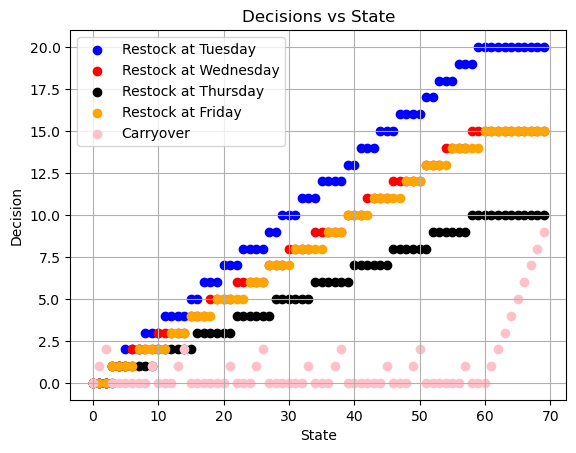

In [92]:
import numpy as np
import matplotlib.pyplot as plt

# Data
data =data

# Extract decisions and corresponding states
decisions = data
states = np.sum(data, axis=1)

# Plotting
plt.scatter(states, decisions[:, 0], label='Restock at Tuesday', color='blue')
plt.scatter(states, decisions[:, 1], label='Restock at Wednesday', color='red')
plt.scatter(states, decisions[:, 2], label='Restock at Thursday', color='black')
plt.scatter(states, decisions[:, 3], label='Restock at Friday', color='orange')
plt.scatter(states, decisions[:, 4], label='Carryover', color='pink')
plt.xlabel('State')
plt.ylabel('Decision')
plt.title('Decisions vs State')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [41]:
V_n_i=np.zeros((N,21))
pol=np.zeros((N,21))
for i in S: 
    V_n_i[0][i] = 0
    pol[0][i] =1
    
alpha =.5    
for n in range(0,N):
    
    for i in S:
        #print(i)
        if n==0:
            V_n_i[n][i] = 0
        
        else:
            #print("dd")
            a=0
            for j in S:
                a = a+ p_ij[i][j]*V_n_i[n-1][j]
            
            b=R + alpha *V_n_i[n-1][0]
            V_n_i[n][i]=2*(i)  + min(b, alpha*a)
            
            if (b<alpha*a):

                pol[n][i]=1
            else:
                pol[n][i]=0 
    #print(V_n_i[n][i])
    count =0
    
    if n>0:
        for i in S: 
            if abs(V_n_i[n][i] - V_n_i[n-1][i]) <.1:
                #print(V_n_i[n][i] , V_n_i[n-1][i])
                count = count +1
        
        
        
    #print(count)
    
    if count > 16:
        #print(count)
        #print("ff")
        break
 
print(n)


IndexError: index 21 is out of bounds for axis 0 with size 21

In [ ]:
pol[n]

In [ ]:
from matplotlib import pyplot as plt
x = list(range(1, len(V_n_i[0]) +1))
plt.figure(figsize=(10, 10))
for i in range(len(V_n_i)):
    plt.plot(x, V_n_i[i], label=str(i))
plt.ylabel('Value',fontsize=12)
plt.xlabel('State',fontsize=12)


plt.show()

In [ ]:
import numpy as np

# Assuming f is your 2D NumPy array
f = np.array([[1, 2, 3],
              [4, 1, 6],
              [-9, 8, 1]])

# Find the flattened index of the minimum value
min_index_flat = np.argmin(f)

# Convert the flattened index to row and column indices
min_index_row, min_index_col = np.unravel_index(min_index_flat, f.shape)

print("Indices where the minimum value occurred:", min_index_row, min_index_col)


In [109]:
import numpy as np
import matplotlib.pyplot as plt

# Resulting matrix
result_matrix = np.array([(0, 0), (1, 0), (1, 1), (2, 1), (3, 1), (3, 2), (4, 2), (5, 2), (5, 3), (6, 3),
                          (7, 3), (7, 4), (8, 4), (9, 4), (9, 5), (10, 5), (11, 5), (11, 6), (12, 6),
                          (13, 6), (13, 7), (14, 7), (15, 7), (15, 8), (16, 8), (17, 8), (17, 9), (18, 9),
                          (19, 9), (19, 10), (20, 10), (20, 10), (20, 10), (20, 10), (20, 10), (20, 10),
                          (20, 10), (20, 10), (20, 10), (20, 10), (20, 10), (20, 10), (20, 10), (20, 10),
                          (20, 10), (20, 10), (20, 10), (20, 10), (20, 10), (20, 10), (20, 10), (20, 10)])

# Reshape the matrix to 7x7 (assuming you want a square matrix)
result_matrix = result_matrix[:-1].reshape(7, 7, 2)

# Create a heatmap
plt.imshow(result_matrix[:, :, 0], cmap='viridis', interpolation='nearest')
plt.colorbar(label='Decision 1')
plt.title('Decision 1 Heatmap')
plt.show()

plt.imshow(result_matrix[:, :, 1], cmap='viridis', interpolation='nearest')
plt.colorbar(label='Decision 2')
plt.title('Decision 2 Heatmap')
plt.show()
